Loading training data...
Creating combined topic dataset...
Loading book data from: ../data/topic/Books_rating.csv
Read 1197 book reviews
Loaded 1197 valid book reviews
Loading movie data from: ../data/topic/IMDB_Dataset.csv
Read 1197 movie reviews
Loaded 1197 valid movie reviews

Selected sport categories: ['rec.sport.baseball', 'rec.sport.hockey']

Fetched 1197 sports articles
Combined dataset created with 3591 entries
Saving combined dataset to ../data/topic/combined_topics.csv
Dataset saved successfully
Train data shape: (3231, 2)
Dev data shape: (360, 2)

Training Naive Bayes classifier...
Initialized bayes classifier
Transforming training text to TF-IDF features...
Training Naive Bayes model...
Model trained successfully with 5000 features.

Test data shape: (18, 4)
   sentence_id                                           sentence sentiment  \
0            0  The stadium was alive with the roar of the cro...  positive   
1            1  That last-minute goal had me jumping out of

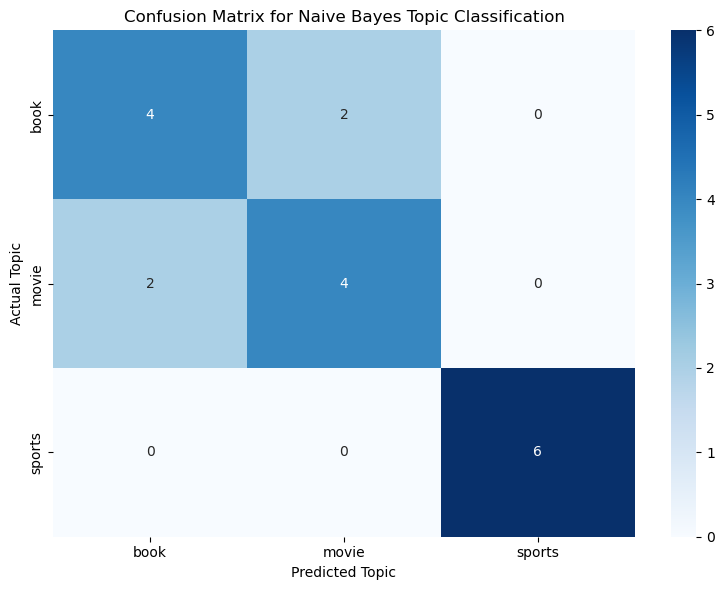


Misclassified examples: 4/18 (22.2%)

Sample of misclassified examples:
                                                 text true_topic  \
3   The story had its moments, though some parts f...       book   
4   I enjoyed the way the timelines shifted, even ...       book   
16  It’s surprising how a promising start could un...      movie   
6   The movie was a wild ride from start to finish...      movie   

   predicted_topic  
3            movie  
4            movie  
16            book  
6             book  

Predicting topics for new sentences:

Text: The game was exciting with a dramatic finish in the final quarter.
Predicted topic: sports

Text: This novel has beautiful character development and an engaging plot.
Predicted topic: book

Text: The cinematography in this film was stunning and the acting superb.
Predicted topic: movie


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

from topic_classification.topic_classification_models import TopicClassifier
from topic_classification.training_data import TrainingDataConstructor
from topic_classification.analyzer import ErrorAnalyzer

# Set paths to data files
BOOKS_PATH = '../data/topic/Books_rating.csv'
MOVIES_PATH = '../data/topic/IMDB_Dataset.csv'
SPORTS_PATH = '../data/topic/sports_and_outdoors.jsonl'
TEST_PATH = '../data/sentiment-topic-test.tsv'

print("Loading training data...")
constructor = TrainingDataConstructor(
    books_topic_path=BOOKS_PATH,
    movies_topic_path=MOVIES_PATH
)

combined_data = constructor.create_combined_dataset(
    nrows=1197,  # Same number for each source
    output_path="../data/topic/combined_topics.csv"  # Save the combined dataset
)

from sklearn.model_selection import train_test_split
train_data, dev_data = train_test_split(
    combined_data, 
    test_size=0.1, 
    random_state=0,
    stratify=combined_data[['topic']]
)

print(f"Train data shape: {train_data.shape}")
print(f"Dev data shape: {dev_data.shape}")

print("\nTraining Naive Bayes classifier...")
classifier = TopicClassifier(model_name='bayes', max_features=5000)
classifier.train(train_data)

test_data = pd.read_csv(TEST_PATH, sep='\t')
print(f"\nTest data shape: {test_data.shape}")
print(test_data.head(3))

print("\nEvaluating model on test data...")
metrics = classifier.evaluate(
    test_data, 
    text_column='sentence',
    label_column='topic',
    display_matrix=True,
    display_misclassified=True
)

print("\nPredicting topics for new sentences:")
new_texts = [
    "The game was exciting with a dramatic finish in the final quarter.",
    "This novel has beautiful character development and an engaging plot.",
    "The cinematography in this film was stunning and the acting superb."
]

predictions = classifier.predict(new_texts)
for text, prediction in zip(new_texts, predictions):
    print(f"\nText: {text}")
    print(f"Predicted topic: {prediction}")

Initialized xgboost classifier
Transforming training text to TF-IDF features...
Encoding labels...
Classes found: ['book' 'movie' 'sports']
Training XGBoost model with 5000 features...


c:\Users\augus\university\Text_Mining\final_project\vrije-project-TM\.pixi\envs\default\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:35:40] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
Accuracy: 0.6111

Classification Report:
              precision    recall  f1-score   support

        book       1.00      0.33      0.50         6
       movie       1.00      0.50      0.67         6
      sports       0.46      1.00      0.63         6

    accuracy                           0.61        18
   macro avg       0.82      0.61      0.60        18
weighted avg       0.82      0.61      0.60        18



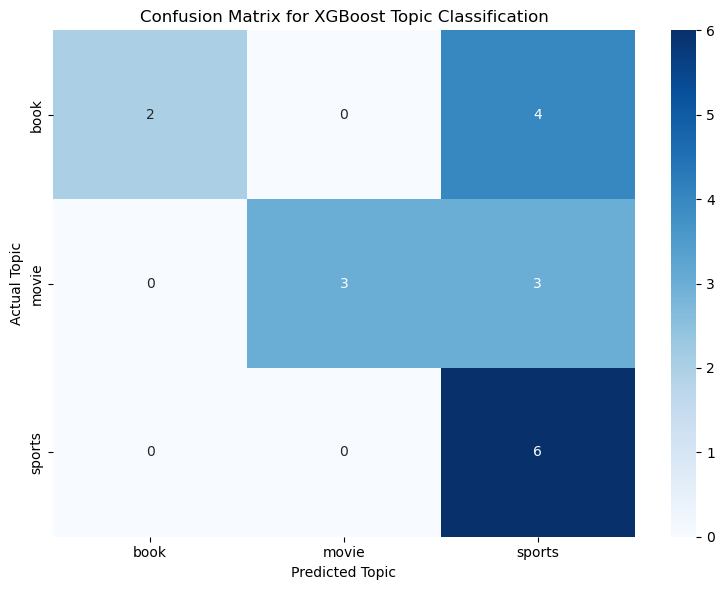


Misclassified examples: 7/18 (38.9%)

Sample of misclassified examples:
                                                 text true_topic  \
16  It’s surprising how a promising start could un...      movie   
9   The trailer was decent, giving you a taste wit...      movie   
4   I enjoyed the way the timelines shifted, even ...       book   
3   The story had its moments, though some parts f...       book   
10  I found the main character so annoying that it...       book   

   predicted_topic  
16          sports  
9           sports  
4           sports  
3           sports  
10          sports  


In [6]:
# Create and train an XGBoost classifier
classifier = TopicClassifier(model_name='xgboost', max_features=5000, n_estimators=100)
classifier.train(train_data)

# Evaluate it
metrics = classifier.evaluate(test_data)

Using device: cpu
Initialized pytorch classifier
Transforming training text to TF-IDF features...
Encoding labels...
Classes found: ['book' 'movie' 'sports']
Model created with input dimension: 5000, output classes: 3
Beginning training for 20 epochs...
Epoch [1/20], Loss: 0.9712
Epoch [5/20], Loss: 0.0097
Epoch [10/20], Loss: 0.0014
Epoch [15/20], Loss: 0.0006
Epoch [20/20], Loss: 0.0003
Training complete!
Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

        book       1.00      0.67      0.80         6
       movie       0.67      0.33      0.44         6
      sports       0.55      1.00      0.71         6

    accuracy                           0.67        18
   macro avg       0.74      0.67      0.65        18
weighted avg       0.74      0.67      0.65        18



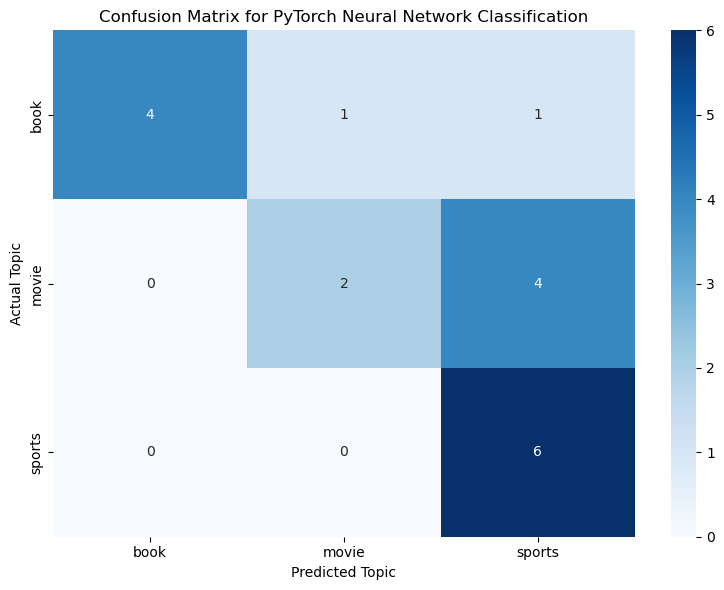


Misclassified examples: 6/18 (33.3%)

Sample of misclassified examples:
                                                 text true_topic  \
9   The trailer was decent, giving you a taste wit...      movie   
6   The movie was a wild ride from start to finish...      movie   
3   The story had its moments, though some parts f...       book   
16  It’s surprising how a promising start could un...      movie   
15  Word is, the screenplay was scribbled down dur...      movie   

   predicted_topic  
9           sports  
6           sports  
3            movie  
16          sports  
15          sports  


In [7]:
# Create and train a PyTorch neural network classifier
classifier = TopicClassifier(
    model_name='pytorch', 
    max_features=5000,
    hidden_dim=128,
    dropout=0.3,
    lr=0.001,
    batch_size=64,
    epochs=20
)

classifier.train(train_data)

metrics = classifier.evaluate(test_data)



ANALYZING BAYES MODEL
Initialized bayes classifier
Transforming training text to TF-IDF features...
Training Naive Bayes model...
Model trained successfully with 5000 features.
Error analysis complete for model: bayes_classifier
Accuracy: 0.7778
Misclassified examples: 4/18 (22.2%)

Confusion Matrix:


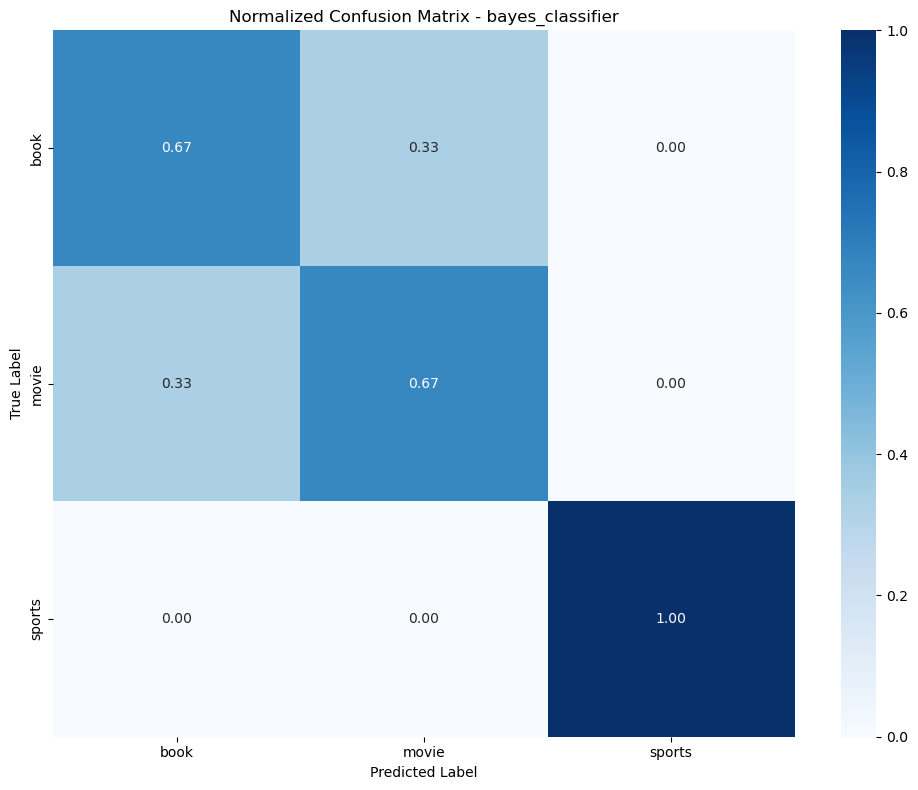


Error Distribution by Class:


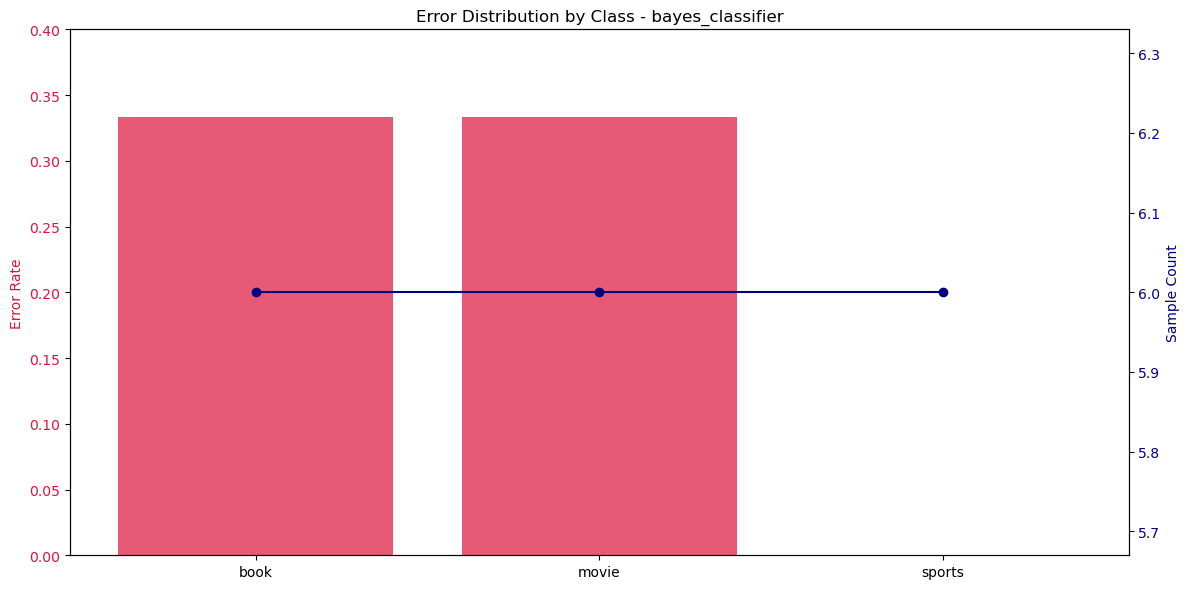


Most common error patterns:
  true_label predicted_label  count
0       book           movie      2
1      movie            book      2

Examples where 'book' was misclassified as 'movie' (2 instances):
                                                text true_label  \
3  The story had its moments, though some parts f...       book   
4  I enjoyed the way the timelines shifted, even ...       book   

  predicted_label  
3           movie  
4           movie  

Examples where 'movie' was misclassified as 'book' (2 instances):
                                                 text true_label  \
6   The movie was a wild ride from start to finish...      movie   
16  It’s surprising how a promising start could un...      movie   

   predicted_label  
6             book  
16            book  

Generating word clouds for error analysis...
Confusion matrix saved to topic_classification/error_analysis_results/bayes\bayes_classifier_confusion_matrix.png


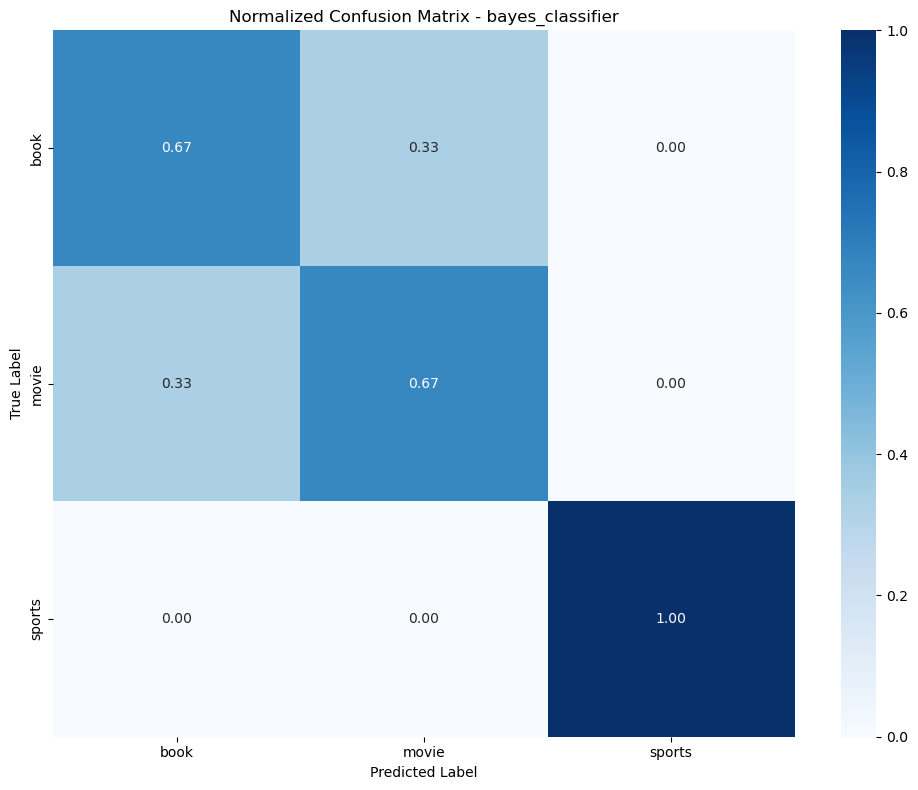

Error distribution plot saved to topic_classification/error_analysis_results/bayes\bayes_classifier_error_distribution.png


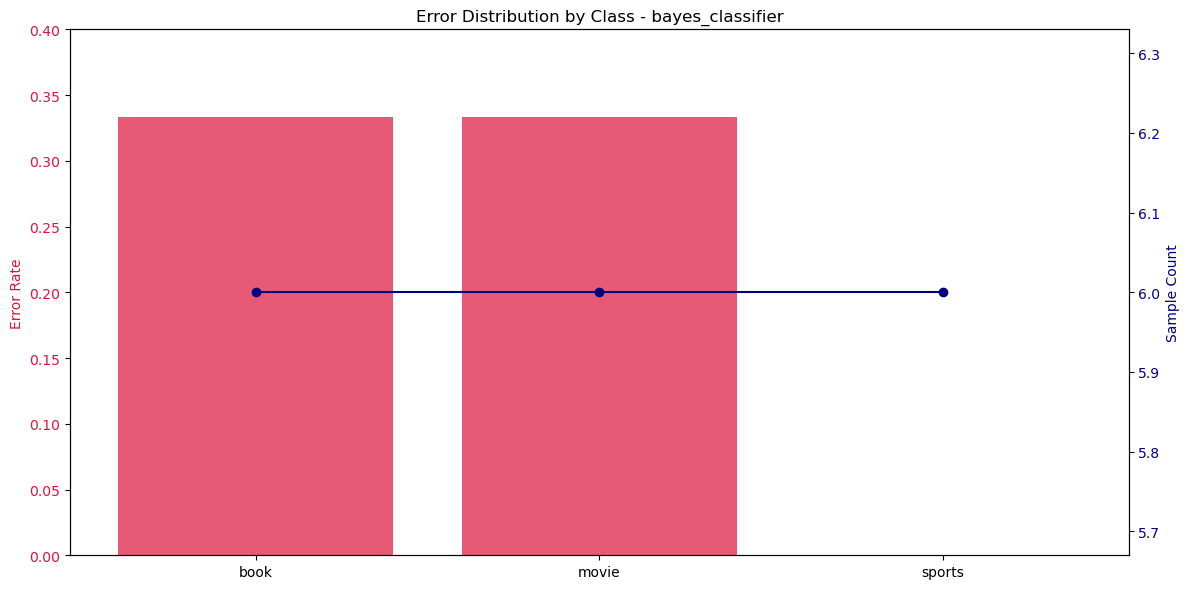

Analysis results saved to topic_classification/error_analysis_results/bayes

Complete analysis saved to topic_classification/error_analysis_results/bayes

ANALYZING XGBOOST MODEL
Initialized xgboost classifier
Transforming training text to TF-IDF features...
Encoding labels...
Classes found: ['book' 'movie' 'sports']
Training XGBoost model with 5000 features...


c:\Users\augus\university\Text_Mining\final_project\vrije-project-TM\.pixi\envs\default\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:36:13] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
Error analysis complete for model: xgboost_classifier
Accuracy: 0.6111
Misclassified examples: 7/18 (38.9%)

Confusion Matrix:


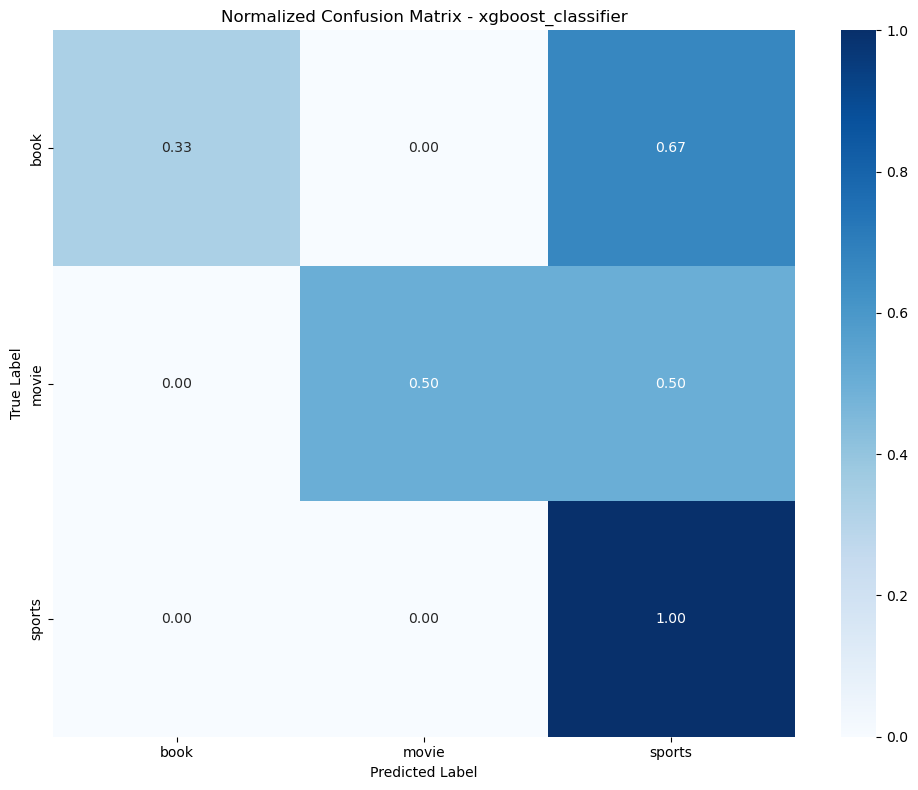


Error Distribution by Class:


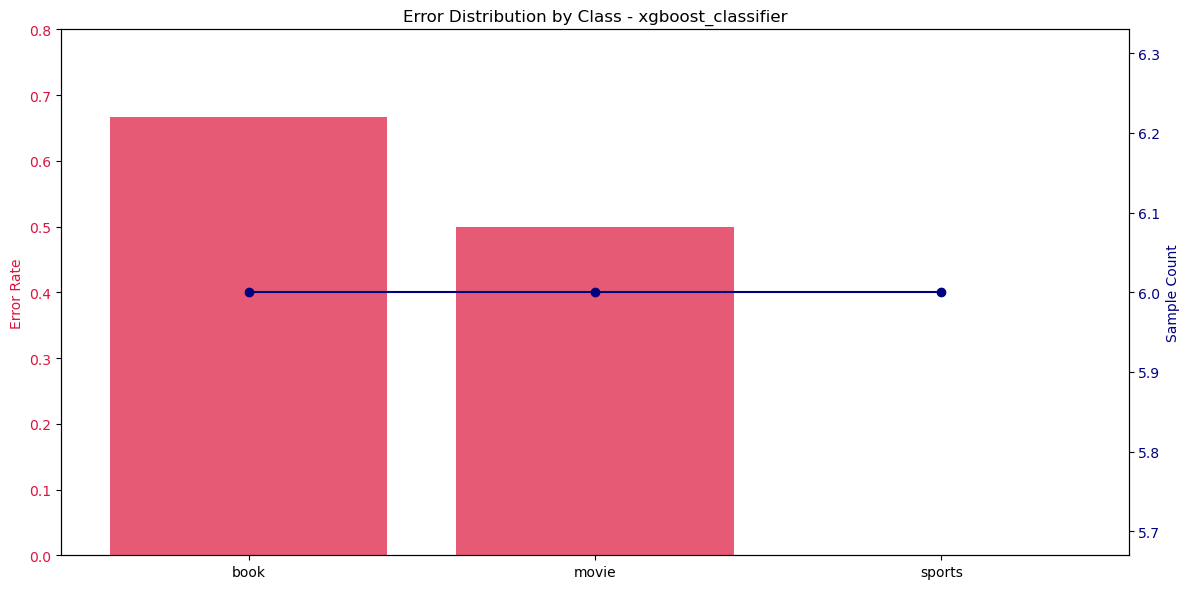


Most common error patterns:
  true_label predicted_label  count
0       book          sports      4
1      movie          sports      3

Examples where 'book' was misclassified as 'sports' (4 instances):
                                                text true_label  \
3  The story had its moments, though some parts f...       book   
4  I enjoyed the way the timelines shifted, even ...       book   

  predicted_label  
3          sports  
4          sports  

Examples where 'movie' was misclassified as 'sports' (3 instances):
                                                 text true_label  \
9   The trailer was decent, giving you a taste wit...      movie   
15  Word is, the screenplay was scribbled down dur...      movie   

   predicted_label  
9           sports  
15          sports  

Generating word clouds for error analysis...
Confusion matrix saved to topic_classification/error_analysis_results/xgboost\xgboost_classifier_confusion_matrix.png


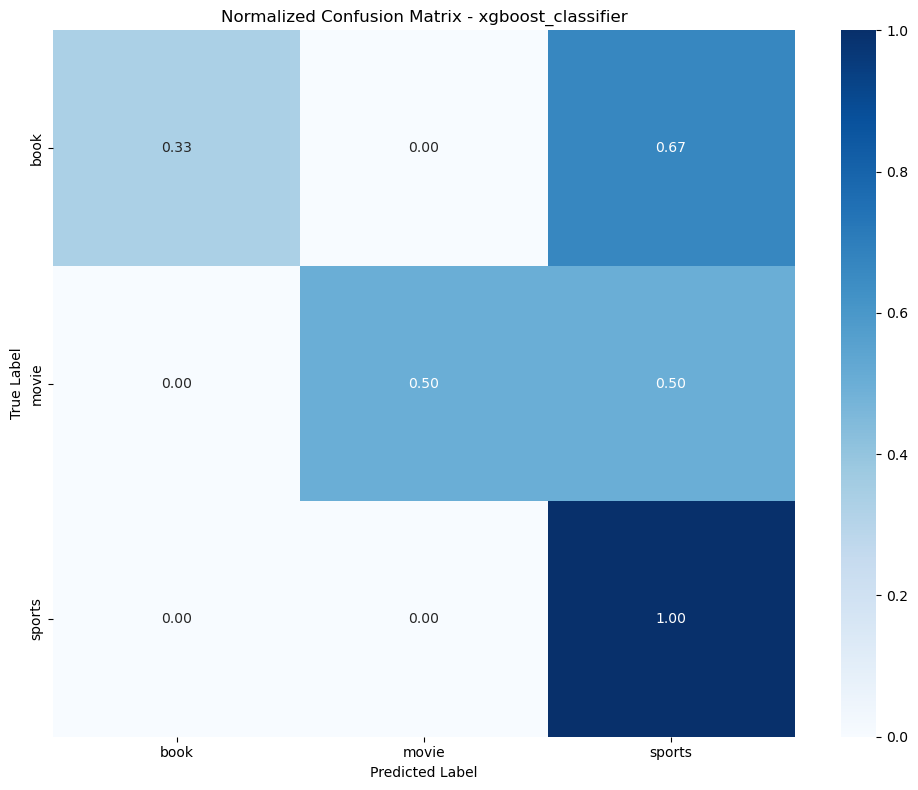

Error distribution plot saved to topic_classification/error_analysis_results/xgboost\xgboost_classifier_error_distribution.png


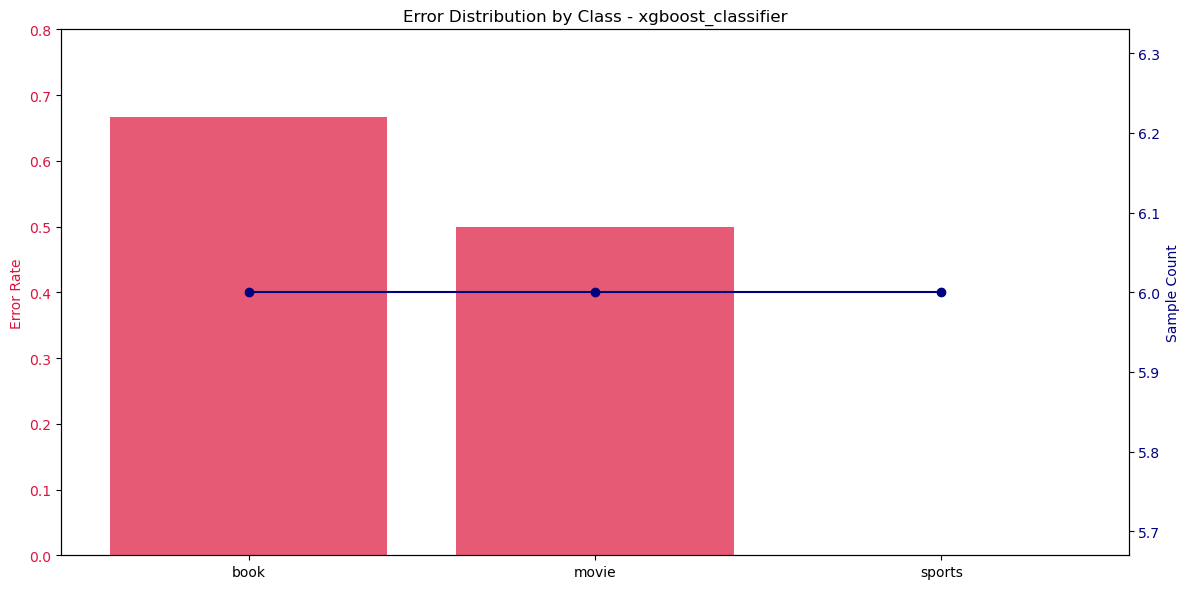

Analysis results saved to topic_classification/error_analysis_results/xgboost

Complete analysis saved to topic_classification/error_analysis_results/xgboost

ANALYZING PYTORCH MODEL
Using device: cpu
Initialized pytorch classifier
Transforming training text to TF-IDF features...
Encoding labels...
Classes found: ['book' 'movie' 'sports']
Model created with input dimension: 5000, output classes: 3
Beginning training for 20 epochs...
Epoch [1/20], Loss: 0.9694
Epoch [5/20], Loss: 0.0100
Epoch [10/20], Loss: 0.0013
Epoch [15/20], Loss: 0.0006
Epoch [20/20], Loss: 0.0002
Training complete!
Error analysis complete for model: pytorch_classifier
Accuracy: 0.6111
Misclassified examples: 7/18 (38.9%)

Confusion Matrix:


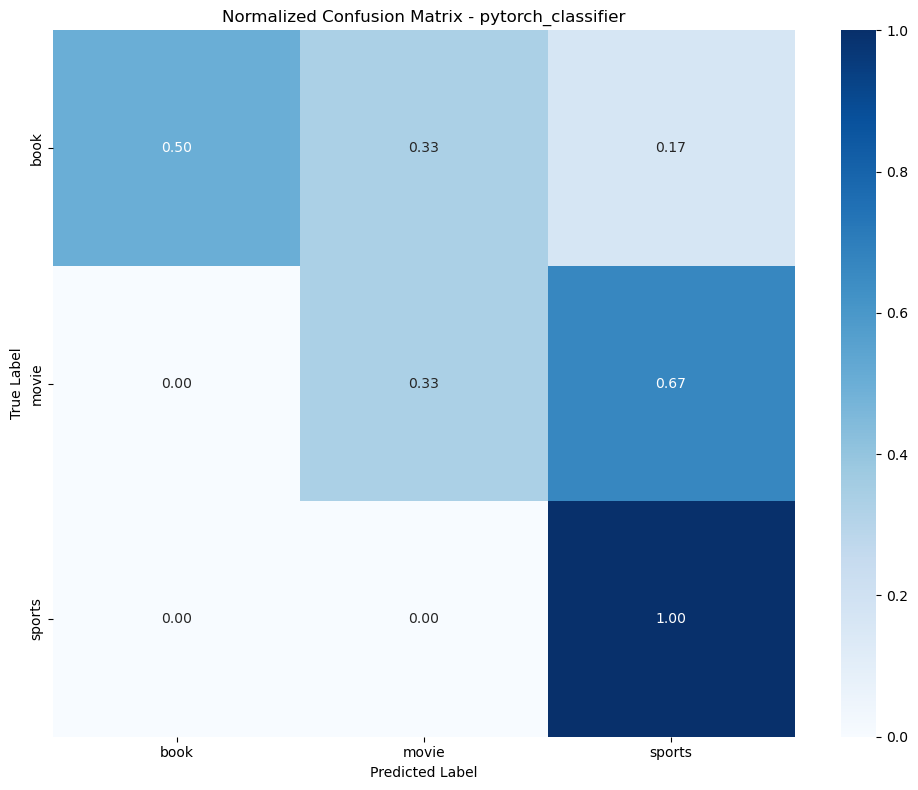


Error Distribution by Class:


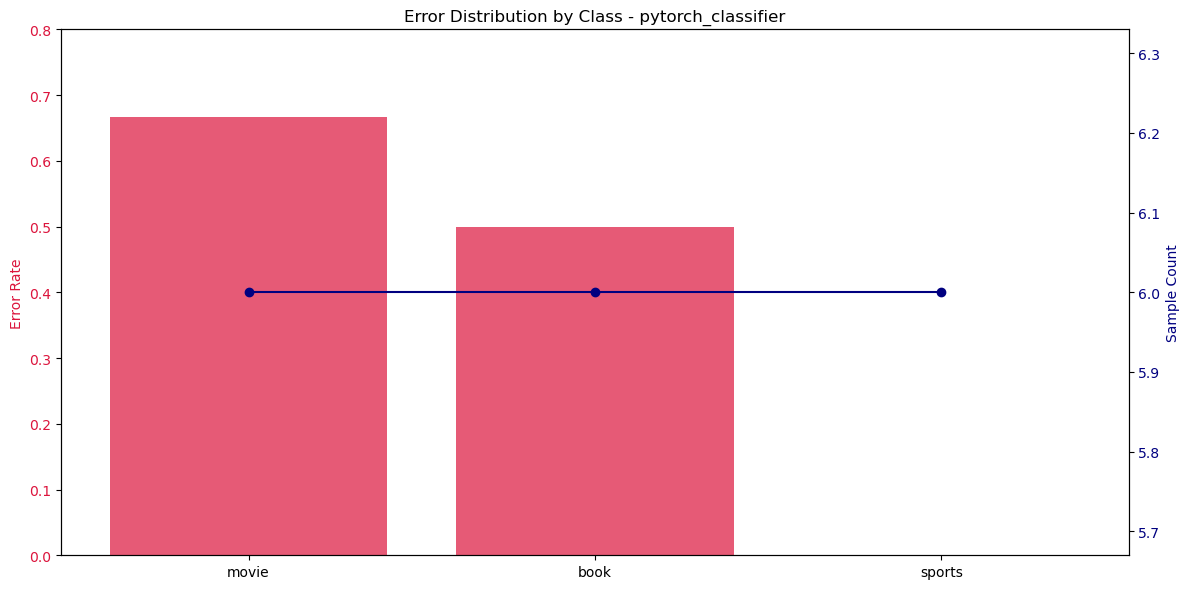


Most common error patterns:
  true_label predicted_label  count
2      movie          sports      4
0       book           movie      2
1       book          sports      1

Examples where 'movie' was misclassified as 'sports' (4 instances):
                                                text true_label  \
6  The movie was a wild ride from start to finish...      movie   
9  The trailer was decent, giving you a taste wit...      movie   

  predicted_label  
6          sports  
9          sports  

Examples where 'book' was misclassified as 'movie' (2 instances):
                                                 text true_label  \
3   The story had its moments, though some parts f...       book   
10  I found the main character so annoying that it...       book   

   predicted_label  
3            movie  
10           movie  

Examples where 'book' was misclassified as 'sports' (1 instances):
                                                text true_label  \
4  I enjoyed the way the t

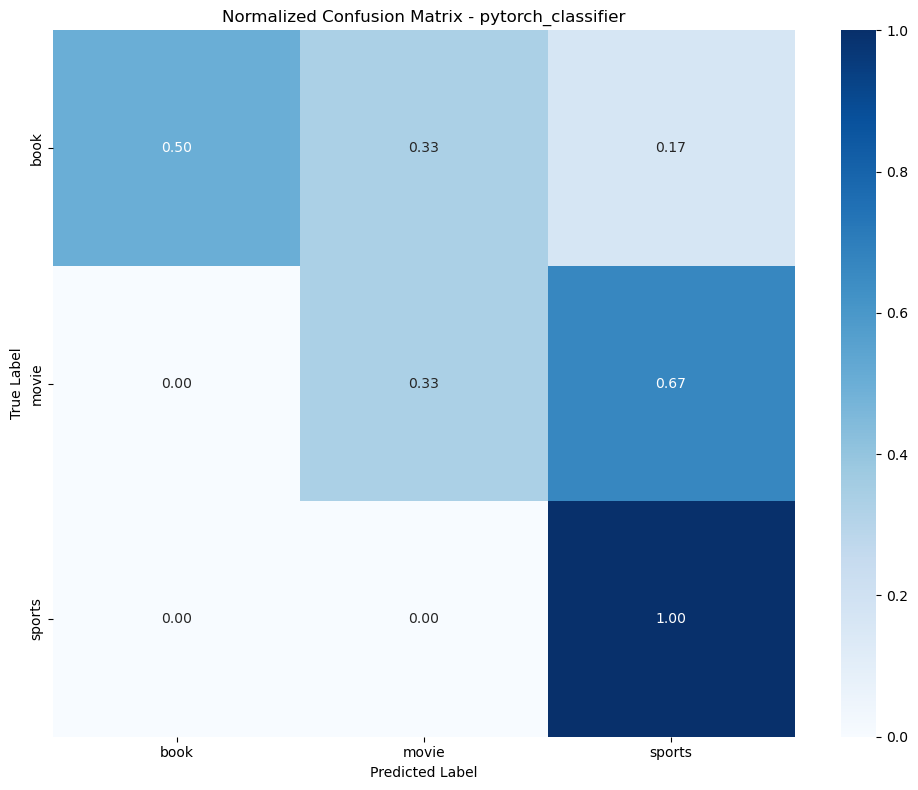

Error distribution plot saved to topic_classification/error_analysis_results/pytorch\pytorch_classifier_error_distribution.png


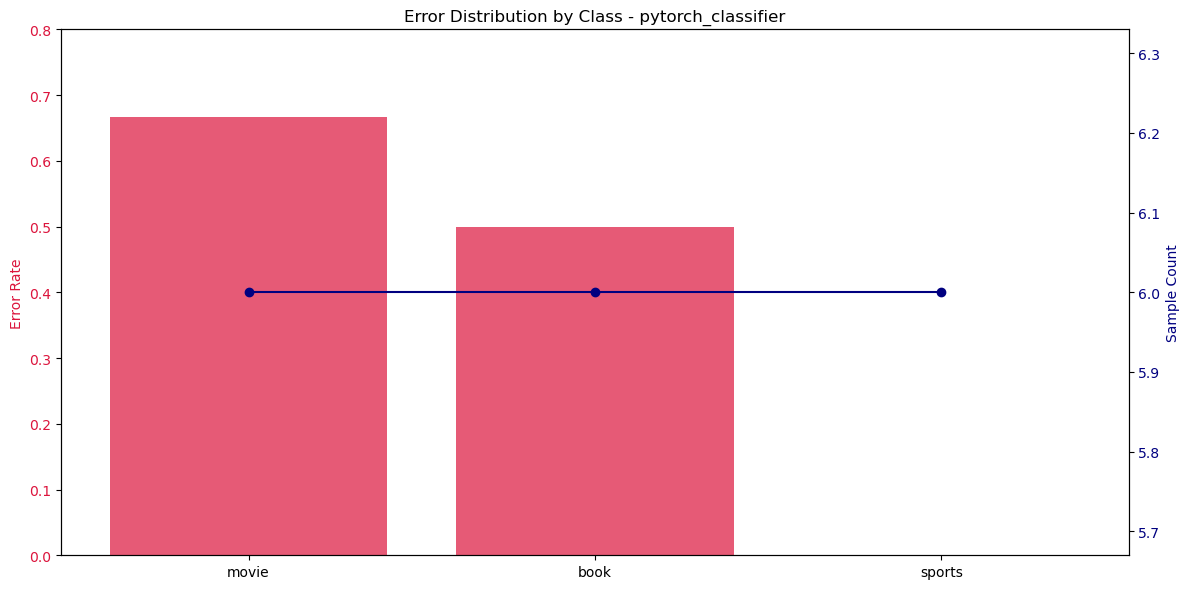

Analysis results saved to topic_classification/error_analysis_results/pytorch

Complete analysis saved to topic_classification/error_analysis_results/pytorch


COMPARATIVE MODEL ANALYSIS

Model Performance Comparison:
         Model Accuracy  Misclassified  Total Error Rate
0  Naive Bayes   0.7778              4     18     22.22%
1      XGBoost   0.6111              7     18     38.89%
2   PyTorch NN   0.6111              7     18     38.89%

Samples misclassified by ALL models:
                                                text true_label  \
0  The story had its moments, though some parts f...       book   
1  I enjoyed the way the timelines shifted, even ...       book   
2  It’s surprising how a promising start could un...      movie   

  naive_bayes_pred xgboost_pred pytorch_pred  
0            movie       sports        movie  
1            movie       sports       sports  
2             book       sports       sports  


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from topic_classification.topic_classification_models import TopicClassifier
from topic_classification.analyzer import ErrorAnalyzer
import numpy as np

os.makedirs("error_analysis_results", exist_ok=True)

def analyze_model_errors(model_name, model_params=None):
    """Run a complete error analysis for a given model type"""
    print(f"\n{'='*50}")
    print(f"ANALYZING {model_name.upper()} MODEL")
    print(f"{'='*50}")
    
    if model_params is None:
        model_params = {}
    classifier = TopicClassifier(model_name=model_name, **model_params)
    classifier.train(train_data)
    
    predictions = classifier.predict(test_data["sentence"])
    
    probabilities = None
    try:
        if hasattr(classifier.model, 'predict_proba'):
            probabilities = classifier.model.predict_proba(test_data["sentence"])
    except:
        pass
    
    analyzer = ErrorAnalyzer(model_name=f"{model_name}_classifier")
    analyzer.analyze(
        texts=test_data["sentence"],
        true_labels=test_data["topic"],
        predicted_labels=predictions,
        probabilities=probabilities
    )
    
    print("\nConfusion Matrix:")
    analyzer.plot_confusion_matrix()
    
    print("\nError Distribution by Class:")
    analyzer.plot_error_distribution()
    
    common_errors = analyzer.get_common_error_pairs(top_n=3)
    print("\nMost common error patterns:")
    print(common_errors)
    
    for _, row in common_errors.iterrows():
        true_label = row["true_label"]
        pred_label = row["predicted_label"]
        count = row["count"]
        
        print(f"\nExamples where '{true_label}' was misclassified as '{pred_label}' ({count} instances):")
        examples = analyzer.get_error_examples(
            true_label=true_label,
            predicted_label=pred_label,
            n_examples=2
        )
        print(examples)
        
    print("\nGenerating word clouds for error analysis...")
    
    save_path = f"topic_classification/error_analysis_results/{model_name}"
    analyzer.save_error_analysis(save_path)
    print(f"\nComplete analysis saved to {save_path}")
    
    return analyzer, predictions

naive_bayes_analyzer, nb_predictions = analyze_model_errors(
    "bayes", 
    {"max_features": 5000}
)

xgboost_analyzer, xgb_predictions = analyze_model_errors(
    "xgboost", 
    {"max_features": 5000, "n_estimators": 100}
)

pytorch_analyzer, nn_predictions = analyze_model_errors(
    "pytorch", 
    {
        "max_features": 5000,
        "hidden_dim": 128,
        "dropout": 0.3,
        "lr": 0.001,
        "batch_size": 64,
        "epochs": 20
    }
)

# Compare models side by side
print("\n\nCOMPARATIVE MODEL ANALYSIS")
print("==========================")

models = ["Naive Bayes", "XGBoost", "PyTorch NN"]
analyzers = [naive_bayes_analyzer, xgboost_analyzer, pytorch_analyzer]

# Create comparison table
comparison_data = []
for model_name, analyzer in zip(models, analyzers):
    accuracy = analyzer.error_analysis["accuracy"]
    misclassified = analyzer.error_analysis["misclassified_count"]
    total = len(analyzer.results_df)
    error_rate = misclassified / total
    
    comparison_data.append({
        "Model": model_name,
        "Accuracy": f"{accuracy:.4f}",
        "Misclassified": misclassified,
        "Total": total,
        "Error Rate": f"{error_rate:.2%}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:")
print(comparison_df)

# Identify common misclassifications across all models
print("\nSamples misclassified by ALL models:")
common_failures = []

for i, row in test_data.iterrows():
    text = row["sentence"]
    true_label = row["topic"]
    nb_pred = nb_predictions[i]
    xgb_pred = xgb_predictions[i]
    nn_pred = nn_predictions[i]
    
    if nb_pred != true_label and xgb_pred != true_label and nn_pred != true_label:
        common_failures.append({
            "text": text,
            "true_label": true_label,
            "naive_bayes_pred": nb_pred,
            "xgboost_pred": xgb_pred,
            "pytorch_pred": nn_pred
        })

if common_failures:
    failures_df = pd.DataFrame(common_failures)
    print(failures_df)
else:
    print("No samples were misclassified by all three models.")

In [ ]:
def plot_model_comparison(analyzers, model_names, figsize=(12, 8), save_path=None):
    """
    Create a visual comparison of multiple models' performance.
    
    Args:
        analyzers: List of ErrorAnalyzer instances for each model
        model_names: List of model names corresponding to the analyzers
        figsize: Size of the figure
        save_path: Path to save the figure (optional)
    """
    if len(analyzers) != len(model_names):
        raise ValueError("Number of analyzers must match number of model names")
    
    # Extract performance metrics
    metrics = {
        'Accuracy': [],
        'Error Rate': []
    }
    
    for analyzer in analyzers:
        metrics['Accuracy'].append(analyzer.error_analysis["accuracy"])
        metrics['Error Rate'].append(analyzer.error_analysis["misclassified_percent"])
    
    # Set up the plot
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()
    
    # Set position of bars on x axis
    x = np.arange(len(model_names))
    width = 0.35
    
    # Plot accuracy bars
    acc_bars = ax1.bar(x - width/2, metrics['Accuracy'], width, color='forestgreen', alpha=0.7, 
                      label='Accuracy')
    ax1.set_ylabel('Accuracy', color='forestgreen', fontsize=12)
    ax1.set_ylim(0, max(metrics['Accuracy']) * 1.2)
    ax1.tick_params(axis='y', labelcolor='forestgreen')
    
    # Add accuracy values on top of bars
    for i, bar in enumerate(acc_bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', color='forestgreen', fontweight='bold')
    
    # Plot error rate bars
    err_bars = ax2.bar(x + width/2, metrics['Error Rate'], width, color='crimson', alpha=0.7, 
                      label='Error Rate')
    ax2.set_ylabel('Error Rate', color='crimson', fontsize=12)
    ax2.set_ylim(0, max(metrics['Error Rate']) * 1.2)
    ax2.tick_params(axis='y', labelcolor='crimson')
    
    # Add error rate values on top of bars
    for i, bar in enumerate(err_bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', color='crimson', fontweight='bold')
    
    # Add labels and title
    ax1.set_xticks(x)
    ax1.set_xticklabels(model_names, fontsize=12)
    plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
    
    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.tight_layout()
    
    # Save figure if requested
    if save_path:
        plt.savefig(save_path)
        print(f"Comparison chart saved to {save_path}")
    
    plt.show()

In [ ]:
plot_model_comparison(
    analyzers=[naive_bayes_analyzer, xgboost_analyzer, pytorch_analyzer],
    model_names=["Naive Bayes", "XGBoost", "PyTorch NN"],
    save_path="error_analysis_results/model_comparison.png"
)